In [1]:
from helpers import load_csv_data

In [2]:
(
    x_train,
    x_test,
    y_train,
    train_ids,
    test_ids,
    train_header,
    test_header,
) = load_csv_data("./data")

(array([-1,  1]), array([299160,  28975]))


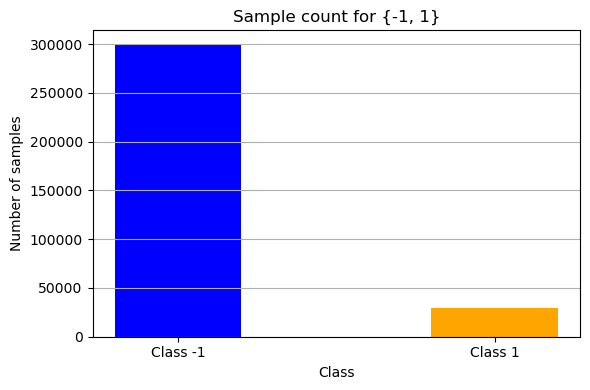

In [3]:
import numpy as np
import matplotlib.pyplot as plt

class_counts = np.unique(y_train, return_counts=True)
print(class_counts)

plt.figure(figsize=(6, 4))
plt.bar(class_counts[0], class_counts[1], color=["blue", "orange"])
plt.title("Sample count for {-1, 1}")
plt.xlabel("Class")
plt.ylabel("Number of samples")
plt.xticks(class_counts[0], labels=["Class -1", "Class 1"], rotation=0)
plt.grid(axis="y")

plt.tight_layout()
plt.show()

### Plot for the report
Show the different stages of our work

In [12]:
import data_processing as prep
from implementations import mean_squared_error_gd
from helpers import split_data_rand, initialize_w, map_results
from costs import calculate_f1_score, calculate_accuracy

x_train_local, y_train_local, x_test_local, y_test_local = split_data_rand(
    y_train, x_train, 0.9, 1
)
f1_scores = []
accuracies = []
# cleaned complete data, feature selection, upsampling, ratio

In [13]:
x_tr_clean = prep.replace_nan_values(x_train_local)
x_tr_clean = prep.standardize(x_tr_clean)
x_te_clean = prep.replace_nan_values(x_test_local)
x_te_clean = prep.standardize(x_te_clean)
w_clean_in = initialize_w(x_tr_clean)
w_clean, _ = mean_squared_error_gd(y_train_local, x_tr_clean, w_clean_in, 500, 0.1)
prediction_clean = x_te_clean @ w_clean
prediction_clean = map_results(prediction_clean, 0.5)
f1_clean = calculate_f1_score(y_test_local, prediction_clean)
acc_clean = calculate_accuracy(y_test_local, prediction_clean)
print(f1_clean, acc_clean)
f1_scores.append(f1_clean)
accuracies.append(acc_clean)

0.12080239388230081 0.7582434326811727


In [14]:
x_tr_select, x_tr_header = prep.features_selection(x_tr_clean, train_header)
x_te_select, x_te_header = prep.features_selection(x_te_clean, train_header)
x_tr_select = prep.cleaning(x_tr_select, x_tr_header)
x_te_select = prep.cleaning(x_te_select, x_te_header)
w_select_in = initialize_w(x_tr_select)
w_select, _ = mean_squared_error_gd(y_train_local, x_tr_select, w_select_in, 500, 0.1)
prediction_select = x_te_select @ w_select
prediction_select = map_results(prediction_select, 0.5)
f1_select = calculate_f1_score(y_test_local, prediction_select)
acc_select = calculate_accuracy(y_test_local, prediction_select)
print(f1_select, acc_select)
f1_scores.append(f1_select)
accuracies.append(acc_select)

0.1738874152667256 0.9145791430486987


In [15]:
x_tr_up, y_tr_up = prep.upsample(x_tr_select, y_train_local, 1)
w_up_in = initialize_w(x_tr_up)
w_up, _ = mean_squared_error_gd(y_tr_up, x_tr_up, w_up_in, 500, 0.1)
prediction_up = x_te_select @ w_up
prediction_up = map_results(prediction_up, 0.5)
f1_up = calculate_f1_score(y_test_local, prediction_up)
acc_up = calculate_accuracy(y_test_local, prediction_up)
print(f1_up, acc_up)
f1_scores.append(f1_up)
accuracies.append(acc_up)

0.3981175273467311 0.8557932589748278


In [17]:
# Add final values from run.py with cross validation
f1_scores.append(0.4201118746509161)
accuracies.append(0.8633385344922165)

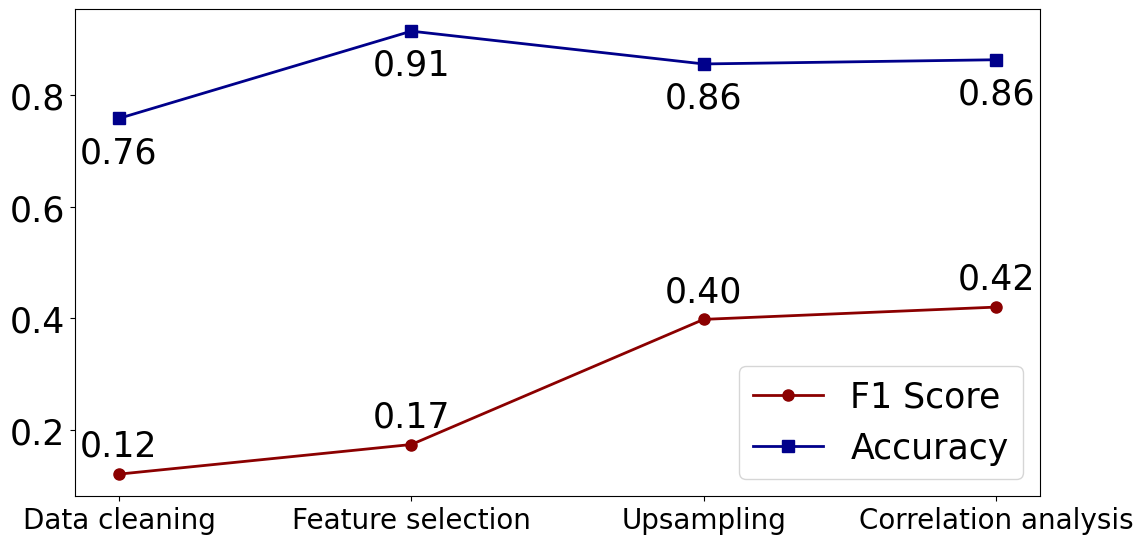

In [36]:
labels = ["Data cleaning", "Feature selection", "Upsampling", "Correlation analysis"]

plt.rcParams.update({"font.size": 25})
x = np.arange(len(labels))
plt.figure(figsize=(12, 6))

plt.plot(
    x,
    f1_scores,
    marker="o",
    label="F1 Score",
    color="darkred",
    linewidth=2,
    markersize=8,
)
plt.plot(
    x,
    accuracies,
    marker="s",
    label="Accuracy",
    color="darkblue",
    linewidth=2,
    markersize=8,
)

plt.xticks(x, labels, fontsize=20)
plt.legend()

for i in range(len(labels)):
    plt.text(x[i], f1_scores[i] + 0.02, f"{f1_scores[i]:.2f}", ha="center", va="bottom")
    plt.text(x[i], accuracies[i] - 0.03, f"{accuracies[i]:.2f}", ha="center", va="top")

plt.tight_layout()
plt.savefig("./data/f1_accuracy_progress.png")
plt.show()